# RFE: Recursive Feature Elimination 

## Wrapper Methods for Feature Selection 

RFE is popular for feature selection because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

There are two important configuration options when using RFE: the choice in the number of features to select and the choice of the algorithm used to help choose features. Both of these hyperparameters can be explored, although the performance of the method is not strongly dependent on these hyperparameters being configured well.

## Theory

A machine learning dataset for classification or regression is comprised of rows and columns, like an excel spreadsheet. Rows are often referred to as samples and columns are referred to as features, e.g. features of an observation in a problem domain.

Feature selection refers to techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score. Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally. 

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains. This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains. Features are scored either using the provided machine learning model (e.g. some algorithms like decision trees offer importance scores) or by using a statistical method.

## Application

The scikit-learn Python machine learning library provides an implementation of RFE for machine learning. RFE is a transform. To use it, first the class is configured with the chosen algorithm specified via the “estimator” argument and the number of features to select via the “n_features_to_select” argument.

The algorithm must provide a way to calculate important scores, such as a decision tree. The algorithm used in RFE does not have to be the algorithm that is fit on the selected features; different algorithms can be used. Once configured, the class must be fit on a training dataset to select the features by calling the fit() function. After the class is fit, the choice of input variables can be seen via the “support_” attribute that provides a True or False for each input variable. It can then be applied to the training and test datasets by calling the transform() function.

It is common to use k-fold cross-validation to evaluate a machine learning algorithm on a dataset. When using cross-validation, it is good practice to perform data transforms like RFE as part of a Pipeline to avoid data leakage.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

## RFE for Classification

First, we can use the make_classification() function to create a synthetic binary classification problem with 1,000 examples and 10 input features, five of which are important and five of which are redundant.

Next, we can evaluate an RFE feature selection algorithm on this dataset. We will use a DecisionTreeClassifier to choose features and set the number of features to five. We will then fit a new DecisionTreeClassifier model on the selected features.

We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [3]:
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [4]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [5]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.887 (0.026)


We can also use the RFE model pipeline as a final model and make predictions for classification.

First, the RFE and model are fit on all available data, then the predict() function can be called to make predictions on new data.

In [6]:
# fit the model on all available data
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      r

In [7]:
# make a prediction for one example
data = [[2.56999479,-0.13019997,3.16075093,-4.35936352,-1.61271951,-1.39352057,-2.48924933,-1.93094078,3.26130366,2.05692145]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1


Running the example fits the RFE pipeline on the entire dataset and is then used to make a prediction on a new row of data, as we might when using the model in an application.

## RFE for Regression

First, we can use the make_regression() function to create a synthetic regression problem with 1,000 examples and 10 input features, five of which are important and five of which are redundant.

Next, we can evaluate an RFE algorithm on this dataset. As we did with the last section, we will evaluate the pipeline with a decision tree using repeated k-fold cross-validation, with three repeats and 10 folds.

We will report the mean absolute error (MAE) of the model across all repeats and folds. The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

In [8]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [9]:
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [10]:
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

In [11]:
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -27.090 (2.600)


We can also use the RFE model pipeline as a final model and make predictions for regression.

First, the Pipeline is fit on all available data, then the predict() function can be called to make predictions on new data.

In [12]:
# fit the model on all available data
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('s',
                 RFE(estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                                     splitter='best'

In [13]:
# make a prediction for one example
data = [[-2.02220122,0.31563495,0.82797464,-0.30620401,0.16003707,-1.44411381,0.87616892,-0.50446586,0.23009474,0.76201118]]
yhat = pipeline.predict(data)
print('Predicted: %.3f' % (yhat))

Predicted: -84.288


Running the example fits the RFE pipeline on the entire dataset and is then used to make a prediction on a new row of data, as we might when using the model in an application.

## RFE Hyperparameters

In this section, we will take a closer look at some of the hyperparameters you should consider tuning for the RFE method for feature selection and their effect on model performance.

### Explore number of features

An important hyperparameter for the RFE algorithm is the number of features to select.

In the previous section, we used an arbitrary number of selected features, five, which matches the number of informative features in the synthetic dataset. In practice, we cannot know the best number of features to select with RFE; instead, it is good practice to test different values.

The example below demonstrates selecting different numbers of features from 2 to 10 on the synthetic binary classification dataset.

In [14]:
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X, y

In [15]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

In [16]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [17]:
# define dataset
X, y = get_dataset()

In [18]:
# get the models to evaluate
models = get_models()

In [19]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>2 0.720 (0.038)
>3 0.815 (0.040)
>4 0.873 (0.033)
>5 0.889 (0.029)
>6 0.885 (0.031)
>7 0.887 (0.027)
>8 0.887 (0.027)
>9 0.885 (0.027)


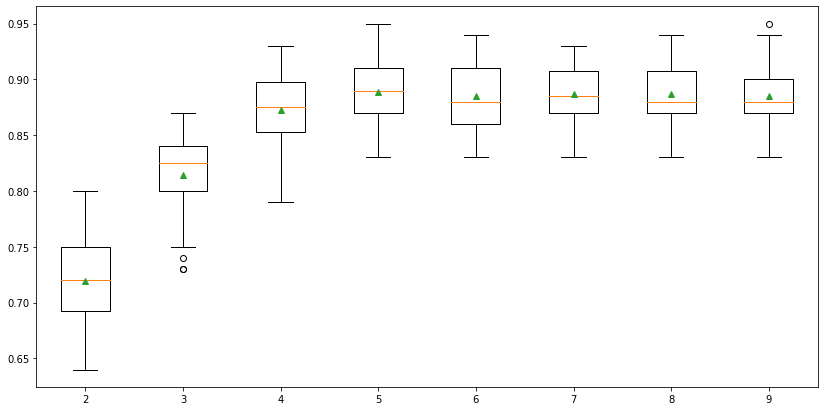

In [20]:
# plot model performance for comparison
plt.figure(figsize=(14,7))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Running the example first reports the mean accuracy for each configured number of input features.

In this case, we can see that performance improves as the number of features increase and perhaps peaks around 4-to-7 as we might expect, given that only five features are relevant to the target variable.

A box and whisker plot is created for the distribution of accuracy scores for each configured number of features.

### Automatically select the number of features

It is also possible to automatically select the number of features chosen by RFE.

This can be achieved by performing cross-validation evaluation of different numbers of features as we did in the previous section and automatically selecting the number of features that resulted in the best mean score.

The RFECV class implements this for us.

The RFECV is configured just like the RFE class regarding the choice of the algorithm that is wrapped. Additionally, the minimum number of features to be considered can be specified via the “min_features_to_select” argument (defaults to 1) and we can also specify the type of cross-validation and scoring to use via the “cv” (defaults to 5) and “scoring” arguments (uses accuracy for classification).

We can demonstrate this on our synthetic binary classification problem and use RFECV in our pipeline instead of RFE to automatically choose the number of selected features.

In [21]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

In [22]:
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [23]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [24]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.889 (0.029)


Running the example reports the mean and standard deviation accuracy of the model.

In this case, we can see the RFE that uses a decision tree and automatically selects a number of features and then fits a decision tree on the selected features achieves a classification accuracy of about 88.2 percent.

### Which features were selected

When using RFE, we may be interested to know which features were selected and which were removed.

This can be achieved by reviewing the attributes of the fit RFE object (or fit RFECV object). The “support_” attribute reports true or false as to which features in order of column index were included and the “ranking_” attribute reports the relative ranking of features in the same order.

The example below fits an RFE model on the whole dataset and selects five features, then reports each feature column index (0 to 9), whether it was selected or not (True or False), and the relative feature ranking.

In [25]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

In [26]:
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [27]:
# fit RFE
rfe.fit(X, y)

RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features=None, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort='deprecated', random_state=None,
                                     splitter='best'),
    n_features_to_select=5, step=1, verbose=0)

In [28]:
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 5.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 2.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 3.000


Running the example lists of the 10 input features and whether or not they were selected as well as their relative ranking of importance.

### Explore base algorithm

There are many algorithms that can be used in the core RFE, as long as they provide some indication of variable importance.

Most decision tree algorithms are likely to report the same general trends in feature importance, but this is not guaranteed. It might be helpful to explore the use of different algorithms wrapped by RFE.

The example below demonstrates how you might explore this configuration option.

In [29]:
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X, y

In [30]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

In [31]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [32]:
# define dataset
X, y = get_dataset()

In [33]:
# get the models to evaluate
models = get_models()

In [34]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>lr 0.895 (0.032)
>per 0.848 (0.036)
>cart 0.885 (0.028)
>rf 0.856 (0.038)
>gbm 0.886 (0.031)


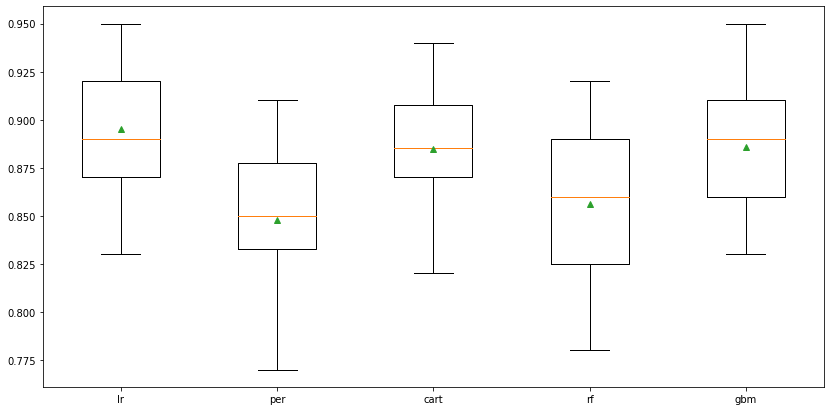

In [35]:
# plot model performance for comparison
plt.figure(figsize=(14,7))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Running the example first reports the mean accuracy for each wrapped algorithm.

In this case, the results suggest that linear algorithms like logistic regression might select better features more reliably than the chosen decision tree and ensemble of decision tree algorithms.

A box and whisker plot is created for the distribution of accuracy scores for each configured wrapped algorithm.

We can see the general trend of good performance with logistic regression, CART and perhaps GBM. This highlights that even though the actual model used to fit the chosen features is the same in each case, the model used within RFE can make an important difference to which features are selected and in turn the performance on the prediction problem.